In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True
plt.style.use("ggplot")

In [2]:
# ml
fillVolume = 10
# Convert to SI-units
fillVolume = fillVolume * 1e-3

# cm
length = 37.3
# Convert to SI-units
length = length * 1e-2

# mm
diameter = 1.75
# Convert to SI-units
diameter = diameter * 1e-3

# Seconds
testOne = np.array([12.2, 12.54, 12.58, 13.16])
meanOne = np.mean(testOne)
# cm
heightOne = 15

testTwo = np.array([9.77, 9.26, 9.58, 10.03])
meanTwo = np.mean(testTwo)
heightTwo = 20

testThree = np.array([7.77, 7.58, 7.74, 7.92])
meanThree = np.mean(testThree)
heightThree = 25

testFour = np.array([7.23, 6.72, 6.65, 6.99])
meanFour = np.mean(testFour)
heightFour = 30

meanTests = np.array([meanOne, meanTwo, meanThree, meanFour])

heights = np.array([heightOne, heightTwo, heightThree, heightFour])
# Convert height to SI units
heights = np.multiply(heights, 1e-2)

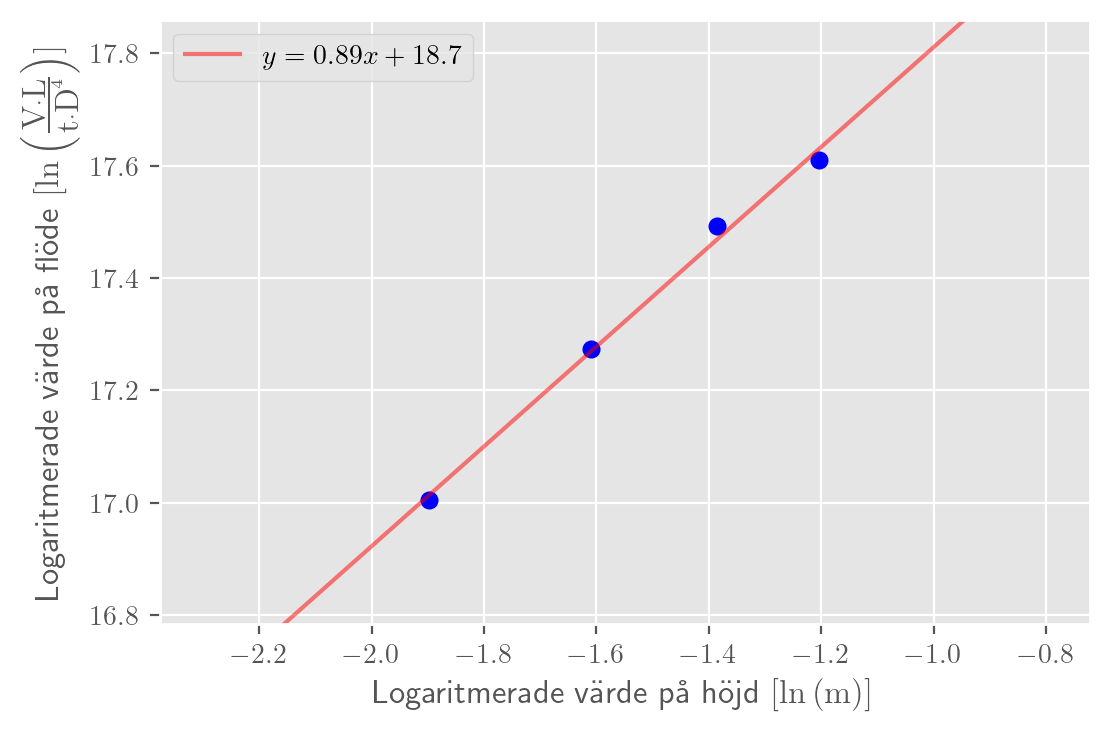

array([ 0.88794594, 18.69875117])

In [3]:
# Calculate flowrate
flowRates = np.divide(fillVolume, meanTests)

# Logarithmic flow
lnFlowRate = np.log(flowRates)

# Logarithmic diameter
lnDiameter = np.log(diameter)

# Logarithmic length
lnLength = np.log(length)

# Find a & b, from previous plots, flöde_per_diameter and flöde_per_längd.
a, b = 3.96558481, -1.04237309

# Logarithmic length
lnHeights = np.log(heights)

# Fits the data to a graph using least squares
poly = np.polyfit(lnHeights, np.subtract(np.subtract(lnFlowRate, b*lnLength), a*lnDiameter), 1)

x1, x2 = -2.1, -1
y1, y2 = x1*poly[0] + poly[1], x2*poly[0] + poly[1]
plt.axline((x1, y1), (x2, y2), alpha=0.5, color="red", label=r'$y = 0.89x + 18.7$')
plt.gcf().set_dpi(200)
ax = plt.gca()
ax.axis("equal")
plt.xlabel(r'Logaritmerade värde på höjd $[\ln\left( \textrm{m}'
             r'\right)]$')
plt.ylabel(r'Logaritmerade värde på flöde $[\ln\left('
             r'\frac{ \textrm{V} \cdot \textrm{L} }{ \textrm{t} \cdot \textrm{D}^4}\right)]$')
plt.scatter(lnHeights, np.subtract(np.subtract(lnFlowRate, b*lnLength), a*lnDiameter), color="blue")
plt.legend()
plt.show()
poly